# Churn EDA 
**Dataset info:** This sample dataset contains customers' data of a telecommunication company and shows customers who have left recently


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

*loading the dataset csv file*

In [4]:
telco_base = pd.read_csv(r"C:\Users\asus\Desktop\churn EDA\Churn_Modelling_EDA.csv")

*Top five records of dataset*

In [5]:
telco_base.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


*Cheking attributes of the dataset like shape, columns and data types*

In [6]:
telco_base.shape

(7043, 21)

In [7]:
telco_base.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
telco_base.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

TotalCharges is regarded as a categorical variable in this dataset while it should be numerical

In [9]:
telco_base.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


SeniorCitizen should be regarded as a categorical variable not a numerical

25% of customers have a tenure more than 55 months and the average tenure is 32 months

customers pay average monthly charges of 64 dollars and 25% of them pay more than 89 dollars


In [10]:
telco_base['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
telco_base['Churn'].value_counts() / len(telco_base['Churn']) * 100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

Text(0.5, 1.0, 'Target Variable counts per category')

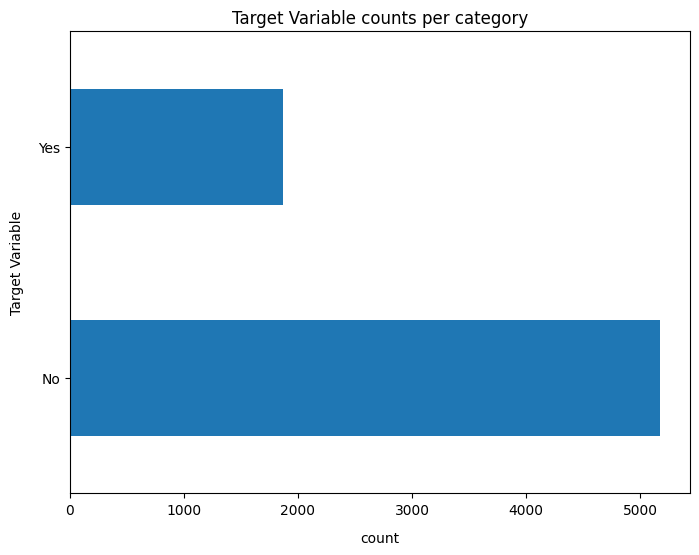

In [12]:
telco_base['Churn'].value_counts().plot(kind='barh', figsize=(8,6))
plt.xlabel("count", labelpad=10)
plt.ylabel("Target Variable", labelpad=10)
plt.title("Target Variable counts per category")

*since target variable is highly imbalanced we should analyze other features to get more insights*

In [13]:
telco_base.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


*checking percentage of missing values in each column*

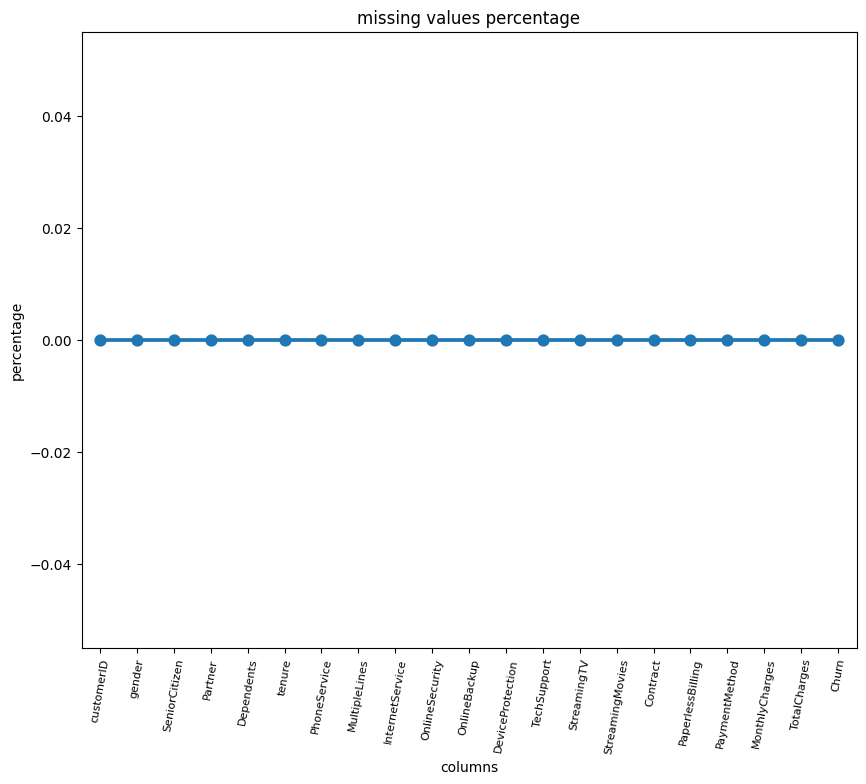

In [14]:
missing = pd.DataFrame(telco_base.isnull().sum()*100/ telco_base.shape[0]).reset_index()
missing.columns=['columns_names', 'percentage']
plt.figure(figsize=(10,8))
ax = sns.pointplot(x ='columns_names', y = 'percentage',data=missing)
plt.title("missing values percentage")
plt.xlabel("columns")
plt.xticks(rotation=80, fontsize=8)
plt.show()


*initial intuition: There is no missing values. Since TotalCharges should be turned into numerical, this situation of missing values can change in further analysis*

# Data Cleaning

*creating a copy of the dataframe*

In [15]:
telco_new = telco_base.copy()

*Turning Total charges into numerical*

In [16]:
telco_new['TotalCharges'] = pd.to_numeric(telco_new['TotalCharges'], errors = 'coerce')

In [17]:
telco_new.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
telco_new.loc[telco_new['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


*as it's seen above, total charges has 11 missing values which should be handled. since compared to the whole dataset, missing values are less than 1% we can delete those missing values altogether*

In [19]:
#removing missing values
telco_new.dropna(how='any', inplace=True)

*deviding tenure into bins for easier further analysis*

In [20]:
print(telco_new.tenure.max())
print(telco_new.tenure.min())

72
1


*It can be devided into 6 bins of 12 months*

In [21]:
labels = [ f"{i}-{i+11}" for i in range(1,72,12) ]

telco_new['tenure_range'] = pd.cut(telco_new['tenure'], bins=range(1,80,12), labels=labels, right=False)

In [22]:
telco_new['tenure_range'].value_counts()

tenure_range
1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: count, dtype: int64

*dropping unnecessary columns*

In [23]:
telco_new.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

In [24]:
telco_new.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Data Exploration 

## Univariate analysis


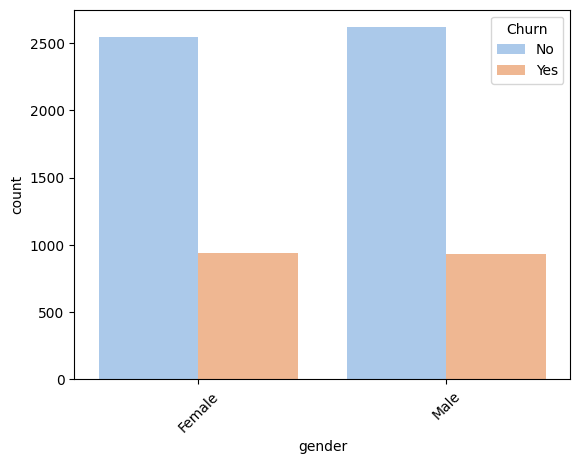

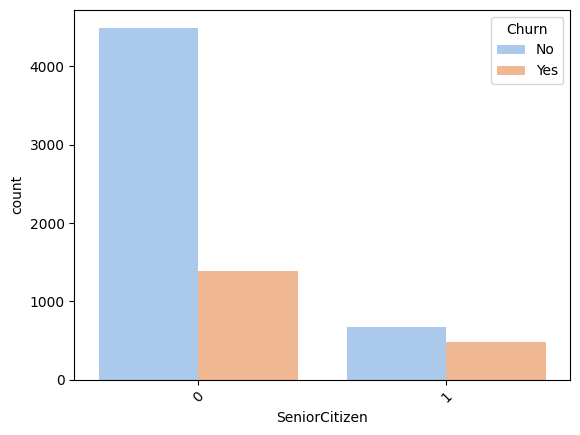

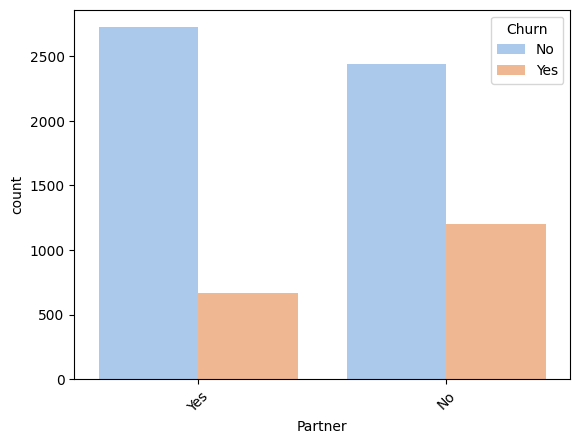

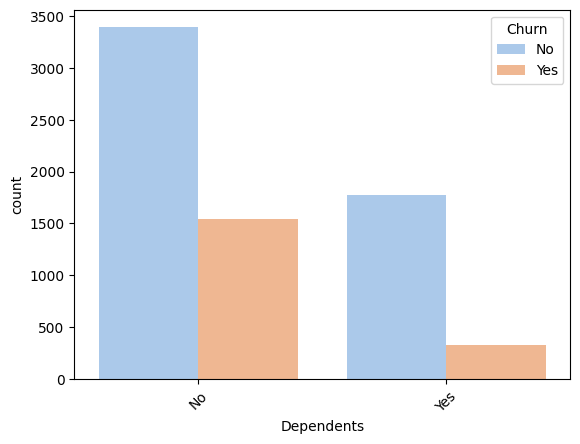

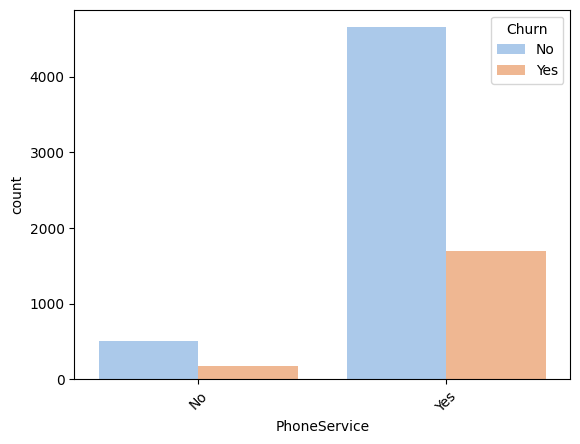

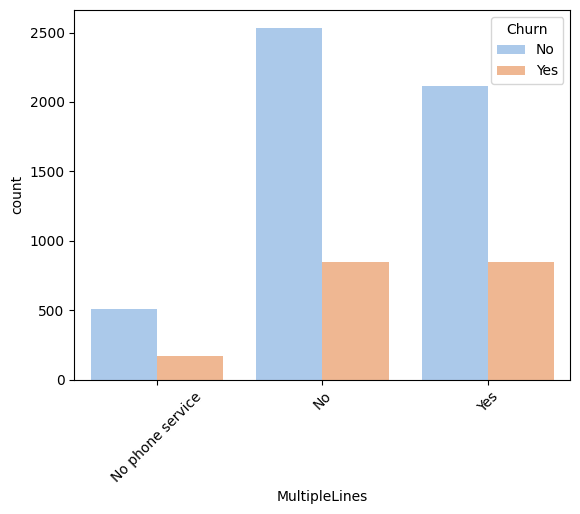

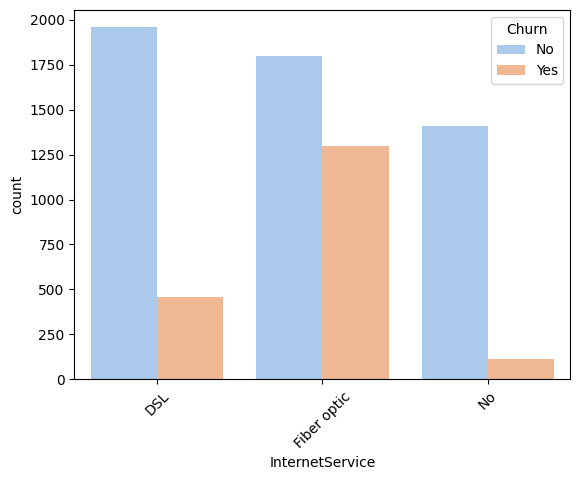

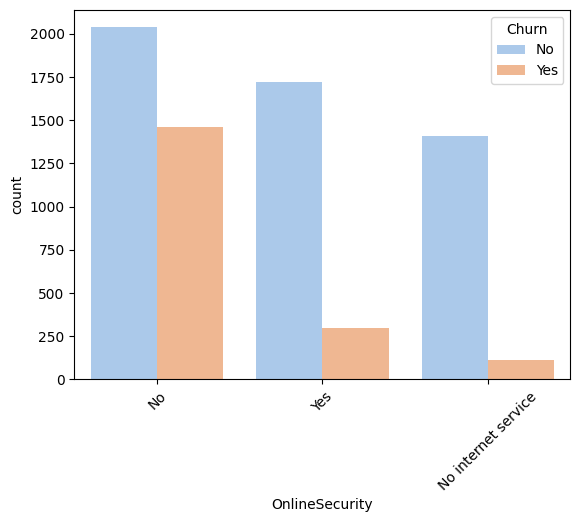

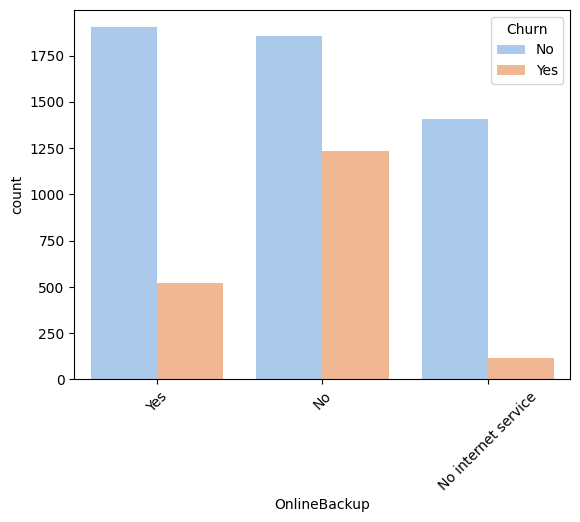

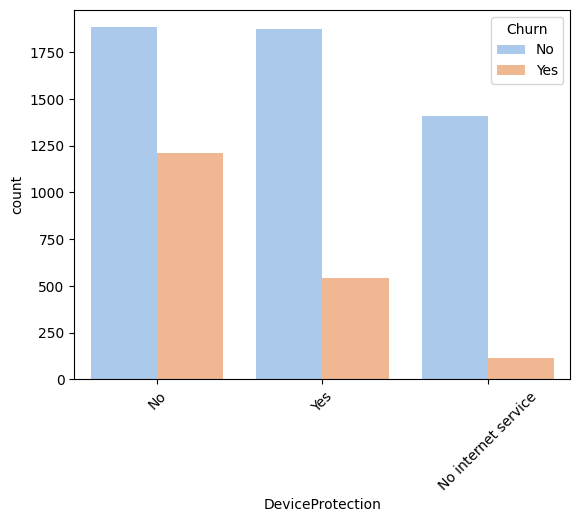

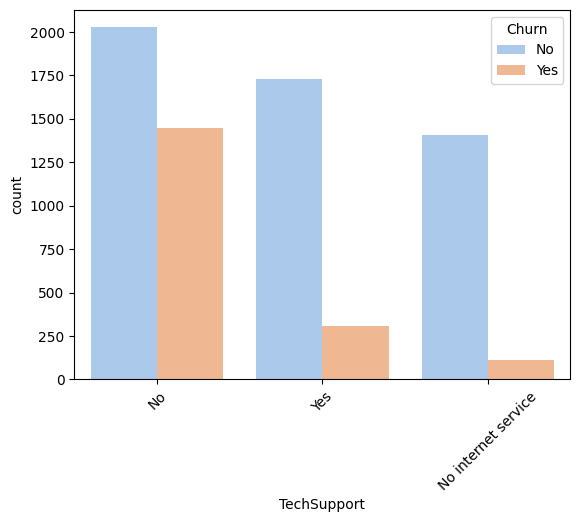

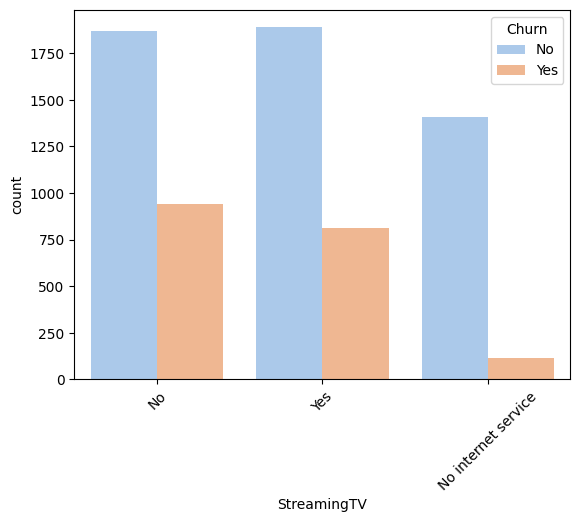

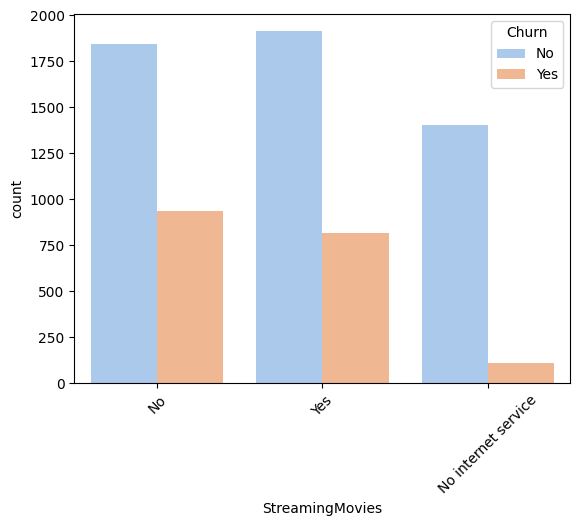

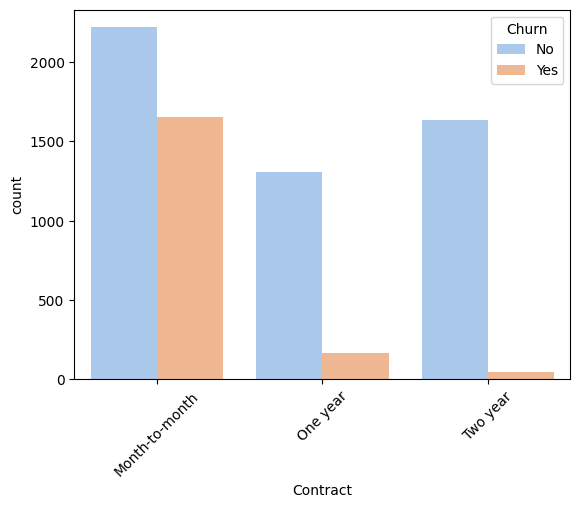

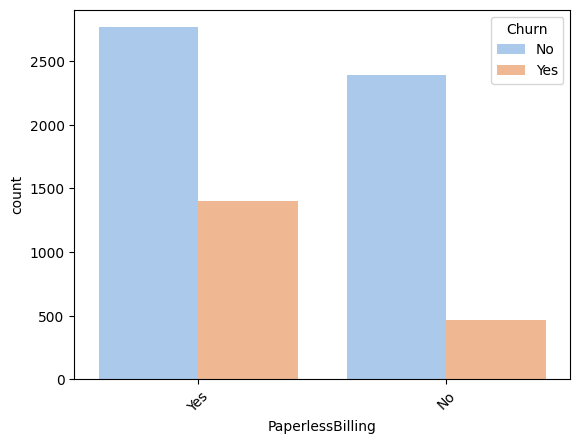

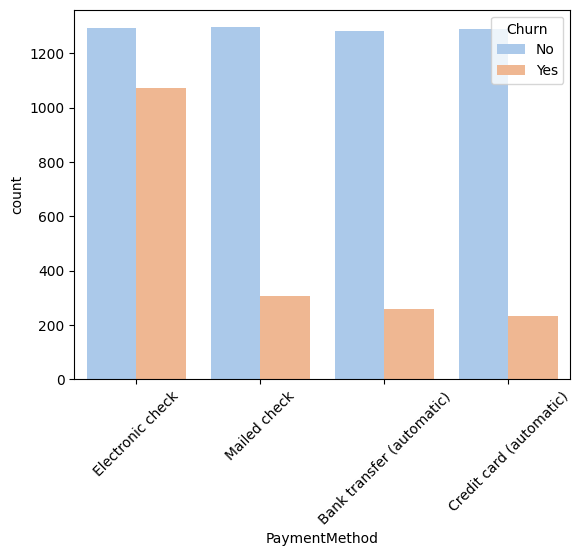

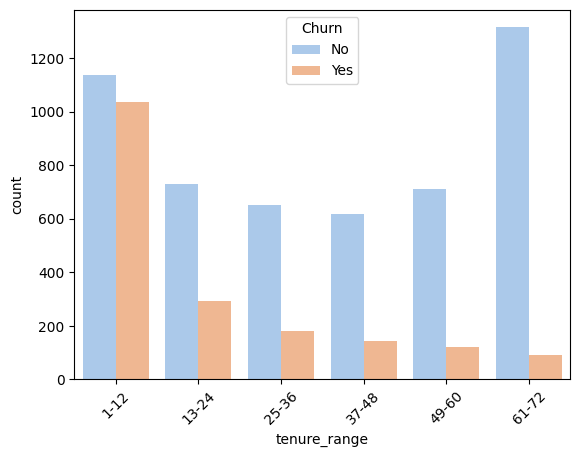

In [25]:
for i,predictor in enumerate(telco_new.drop(["MonthlyCharges","TotalCharges", "Churn"], axis=1)):
    plt.figure(i)
    sns.countplot(data=telco_new, x=predictor, hue='Churn', palette="pastel")
    plt.xticks(rotation = 45)

*by analyzing the distributions above people who are most likely to churn are:*

* senior citizens
* people with no partner
* people with fiber optic internet service
* people with no online security, backup, tech support
* people with month to month contract
* people with electronic check payment method
* people with 1 to 12 months tenure



## Numerical Analysis

In [26]:
telco_new.gender.value_counts()

gender
Male      3549
Female    3483
Name: count, dtype: int64

In [29]:
new_df_target0 = telco_new[telco_new["Churn"] == 'No']
new_df_target1 = telco_new[telco_new["Churn"] == 'Yes']

In [30]:
new_df_target0.gender.value_counts()

gender
Male      2619
Female    2544
Name: count, dtype: int64

In [31]:
new_df_target1.gender.value_counts()

gender
Female    939
Male      930
Name: count, dtype: int64

*It's evident gender doesn't have a big impact*

In [32]:
pd.crosstab(telco_new.PaymentMethod, telco_new.Churn)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


*Customers with an Electronic check payment tend to churn more*

converting Churn into binary variables

In [38]:
telco_numeric = telco_new.copy()

In [39]:
telco_numeric['Churn'] = np.where( telco_numeric.Churn == "Yes",1,0 )

In [40]:
telco_numeric.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_range
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


converting categorical variables into dummy variables

In [43]:
telco_numeric_dummies = pd.get_dummies(data = telco_numeric).astype(int)

In [44]:
telco_numeric_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_range_1-12,tenure_range_13-24,tenure_range_25-36,tenure_range_37-48,tenure_range_49-60,tenure_range_61-72
0,0,29,29,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56,1889,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53,108,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42,1840,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70,151,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


 Relationship between Monthly Charges and Total Charges

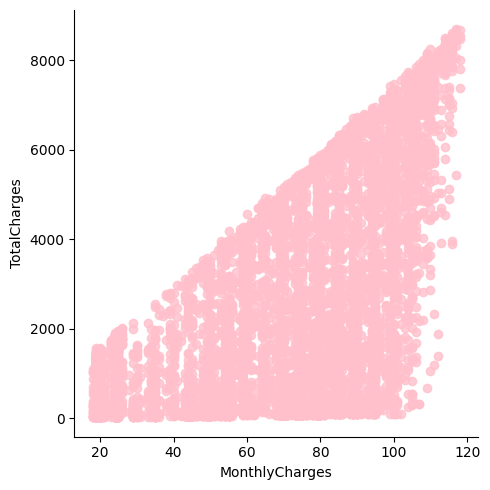

In [65]:
sns.lmplot(data=telco_numeric_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False, scatter_kws={'color': 'pink', 'marker': 's'})

In [67]:
telco_numeric_dummies["TotalCharges"].corr(telco_numeric_dummies["MonthlyCharges"])

np.float64(0.6511252380434775)

*As it's seen above these two variable have a positive correlation*

Text(0.5, 1.0, 'Monthly charges by churn')

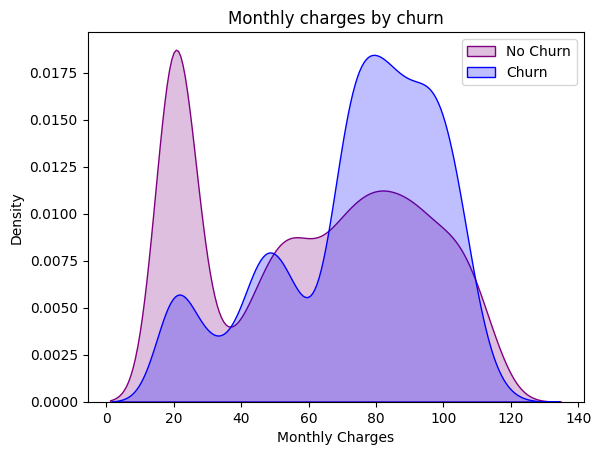

In [66]:
MC = sns.kdeplot(telco_numeric_dummies.MonthlyCharges[telco_numeric_dummies.Churn == 0], color="purple", fill = True)
MC = sns.kdeplot(telco_numeric_dummies.MonthlyCharges[telco_numeric_dummies.Churn == 1], color="blue", fill = True)
MC.legend(["No Churn","Churn"],loc='upper right')
MC.set_ylabel('Density')
MC.set_xlabel('Monthly Charges')
MC.set_title('Monthly charges by churn')

*Customers tend to churn when monthly charges are high*

Text(0.5, 1.0, 'Total charges by churn')

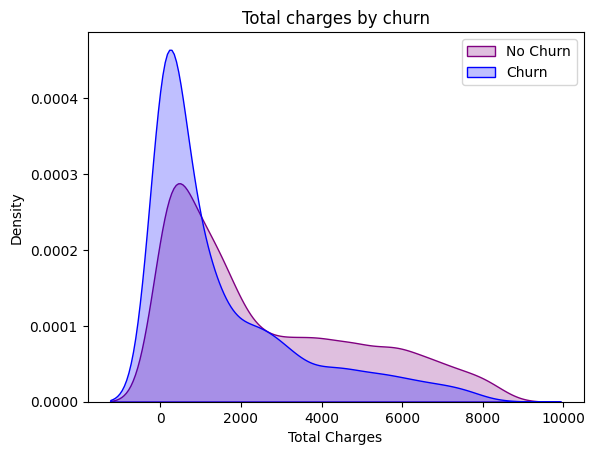

In [68]:
MC = sns.kdeplot(telco_numeric_dummies.TotalCharges[telco_numeric_dummies.Churn == 0], color="purple", fill = True)
MC = sns.kdeplot(telco_numeric_dummies.TotalCharges[telco_numeric_dummies.Churn == 1], color="blue", fill = True)
MC.legend(["No Churn","Churn"],loc='upper right')
MC.set_ylabel('Density')
MC.set_xlabel('Total Charges')
MC.set_title('Total charges by churn')

*Despite what was expected from the positive correlation between monthly and total charges, here we see that low total charges result in customer churn*

*However if we combine the insights of  Tenure, Monthly Charges & Total Charges it becomes transparent: Higher Monthly Charge at lower tenure results into lower Total Charge. Hence Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.*

<Axes: >

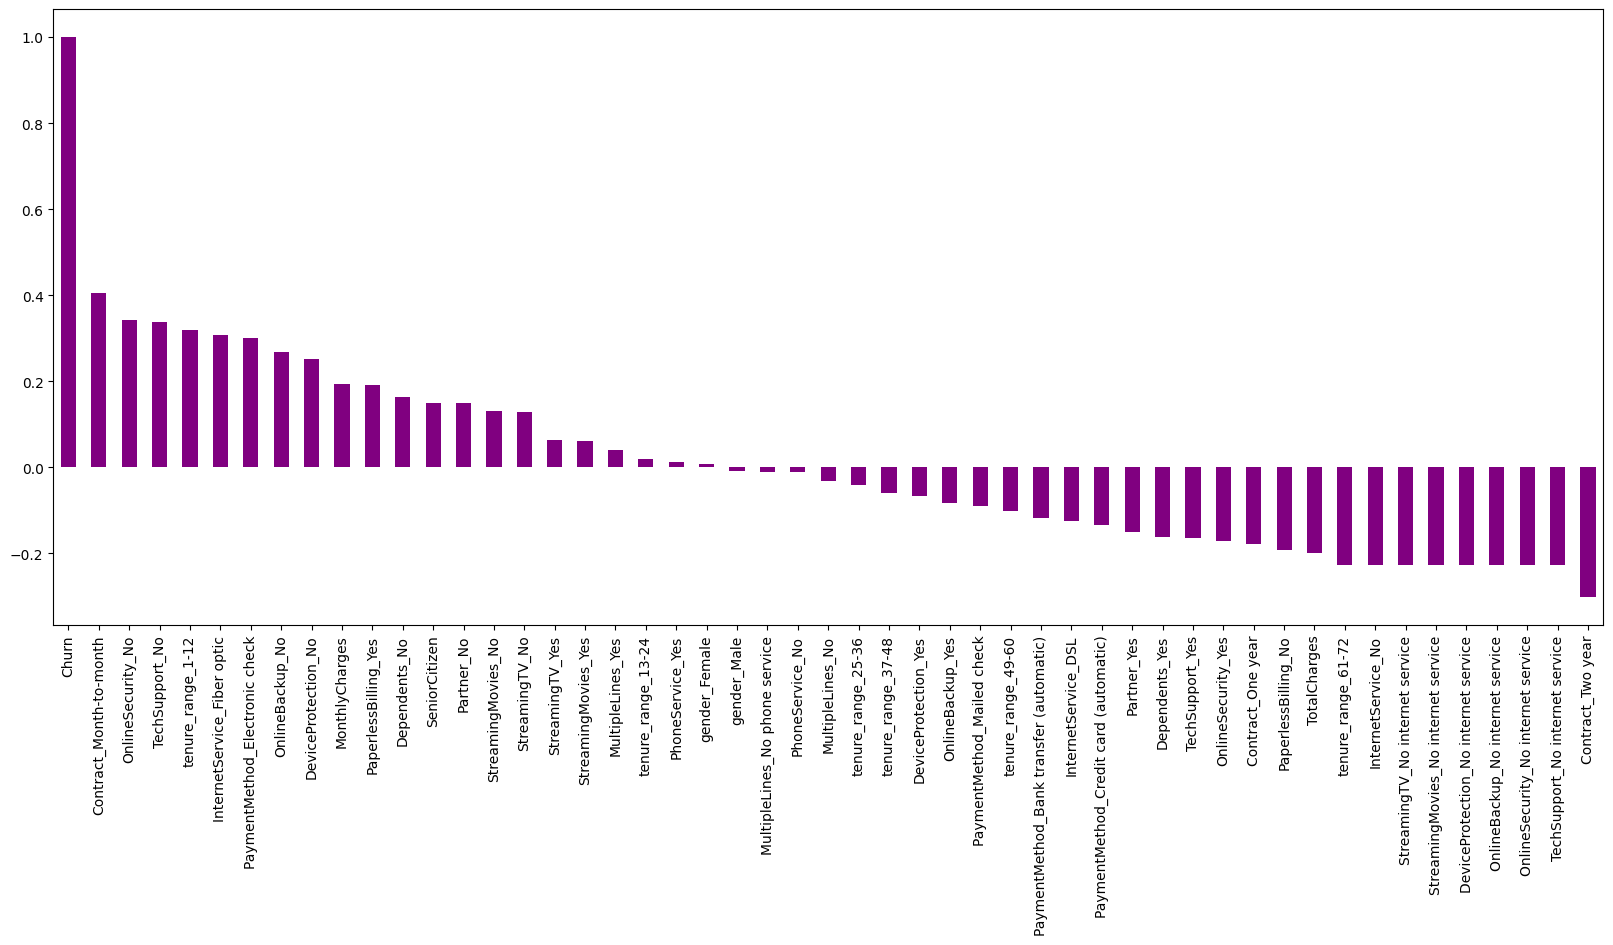

In [78]:
plt.figure(figsize=(20,8))
telco_numeric_dummies.corr()["Churn"].sort_values(ascending = False).plot(kind = 'bar', color = 'purple')

*HIGH Churn is seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet.*

*LOW Churn is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years*

*Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn*

This is also evident from the Heatmap below 

<Axes: >

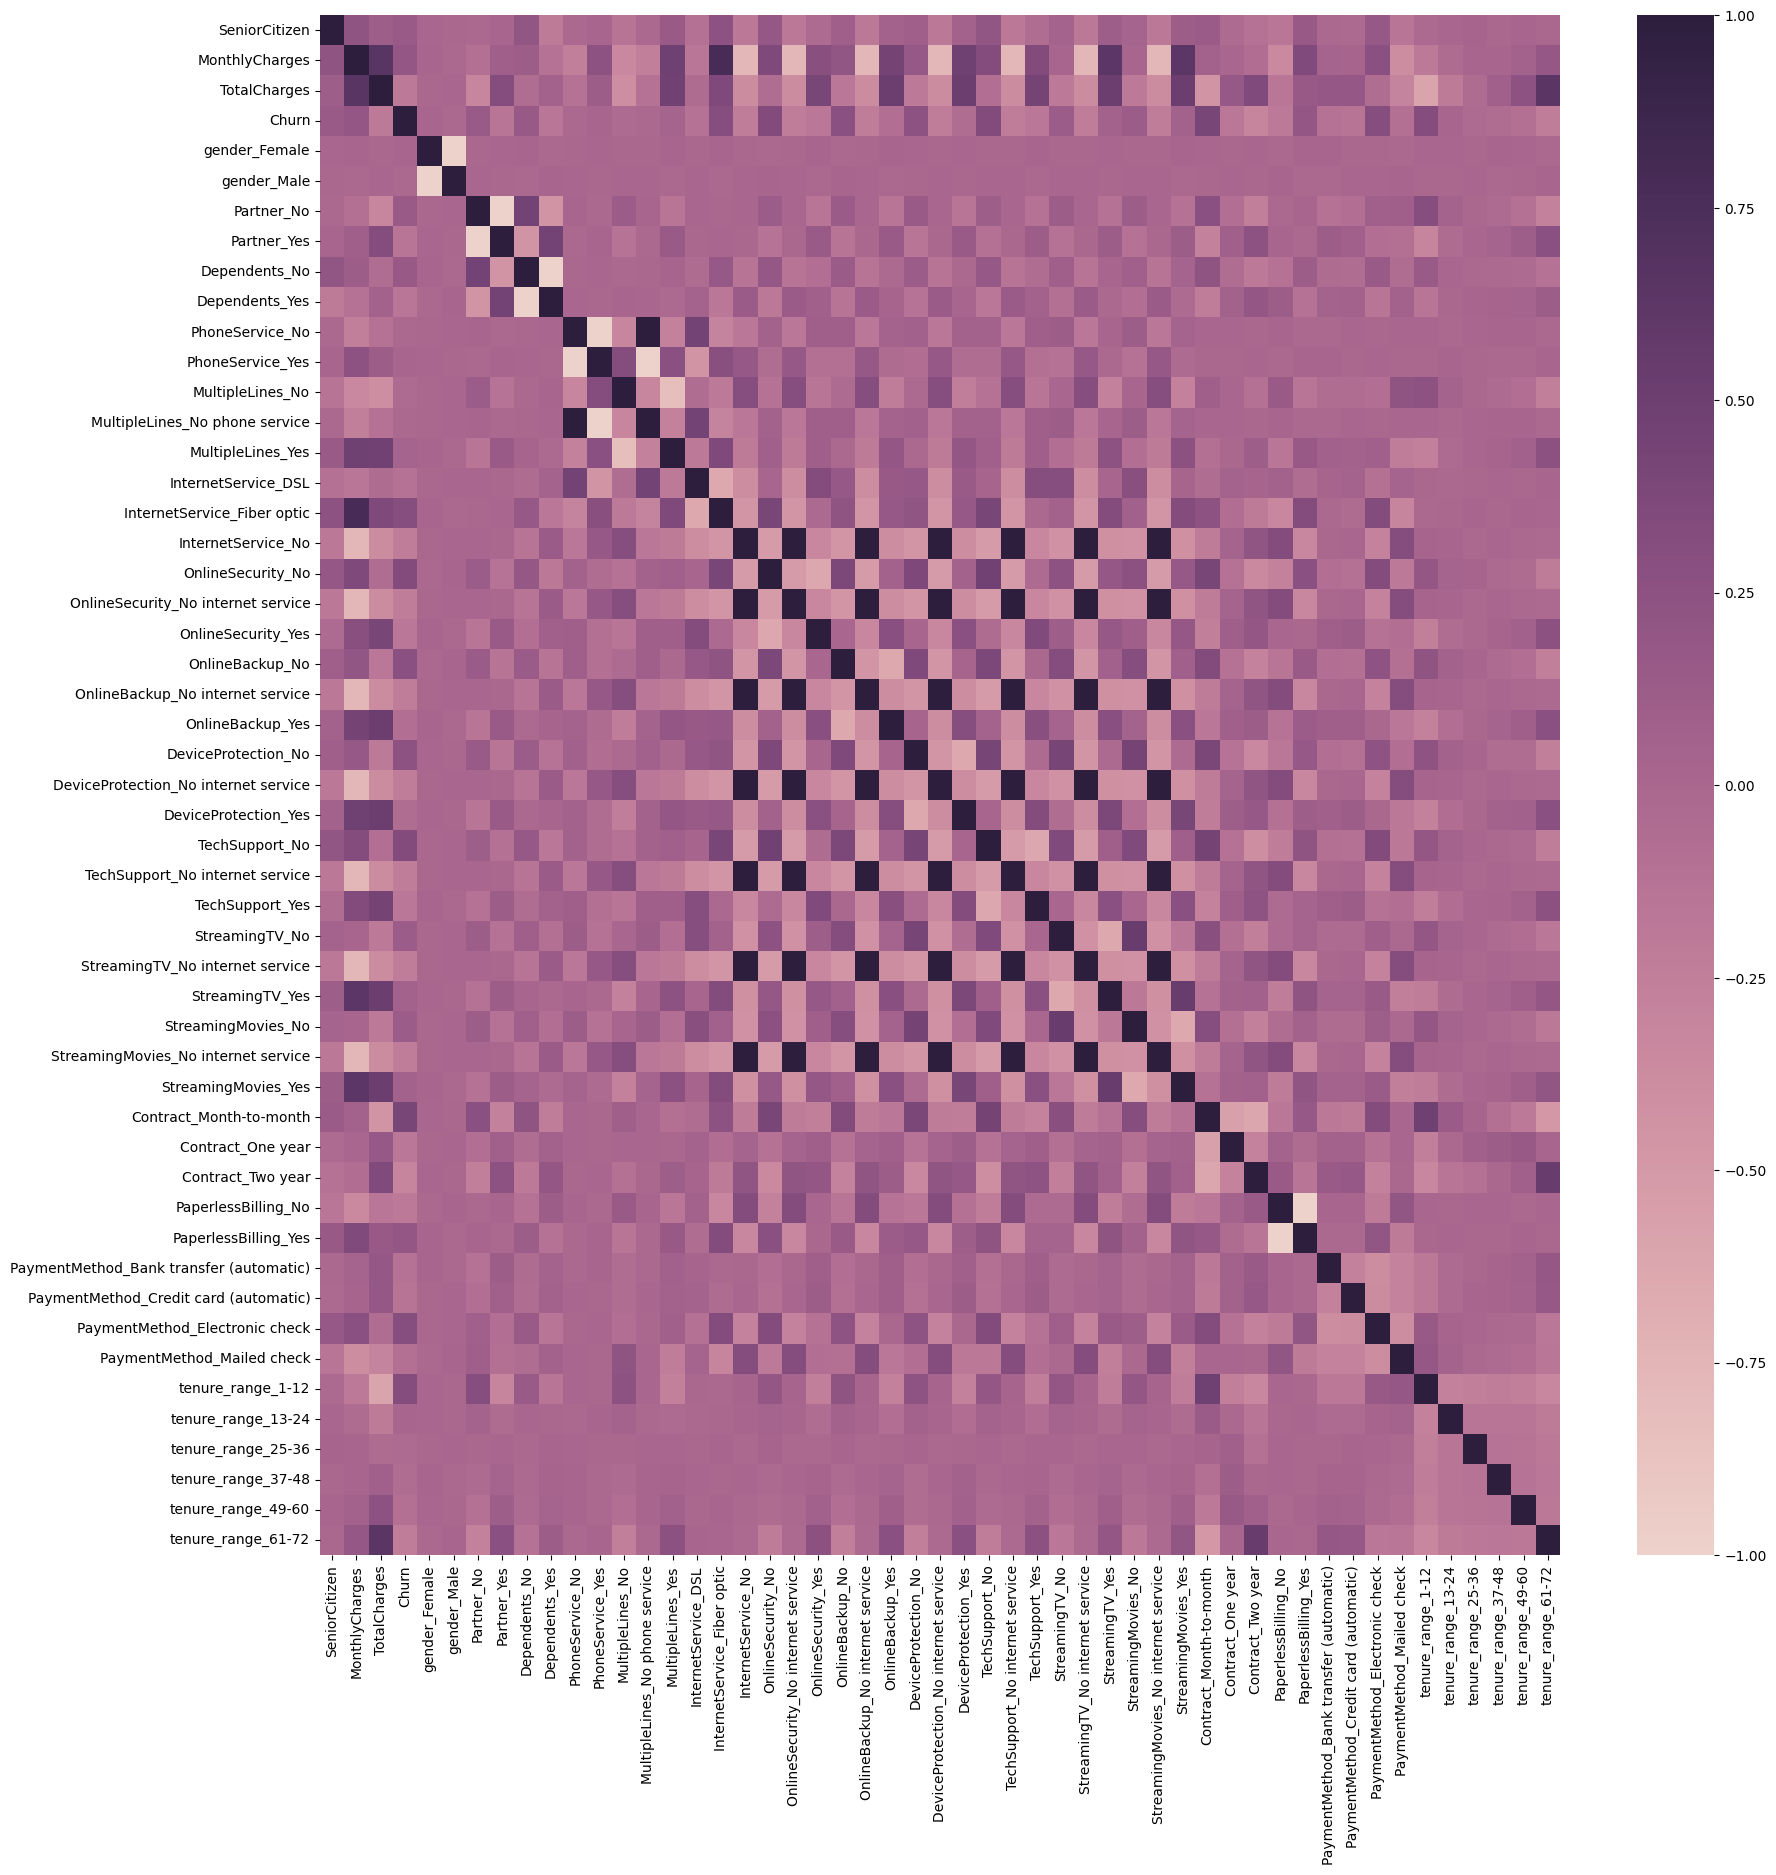

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(telco_numeric_dummies.corr(), cmap=sns.cubehelix_palette(as_cmap=True))

## Bivariate Analysis

In [109]:
telco_numeric_target0 = telco_numeric.loc[telco_numeric.Churn == 0]
telco_numeric_target1 = telco_numeric.loc[telco_numeric.Churn == 1]

In [144]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')

    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30

    if hue:
        df = df.copy()  
        df[hue] = df[hue].astype(str)  

    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + (4 * len(df[hue].unique()) if hue else 0)
    fig.set_size_inches(width, 8)

    plt.xticks(rotation=45)
    plt.title(title)
    custom_palette = ['#8B5CF6', '#EC4899']
    ax = sns.countplot(data=df, x=col, hue=hue, palette=custom_palette, order=df[col].value_counts().index, dodge=True)

    plt.show()

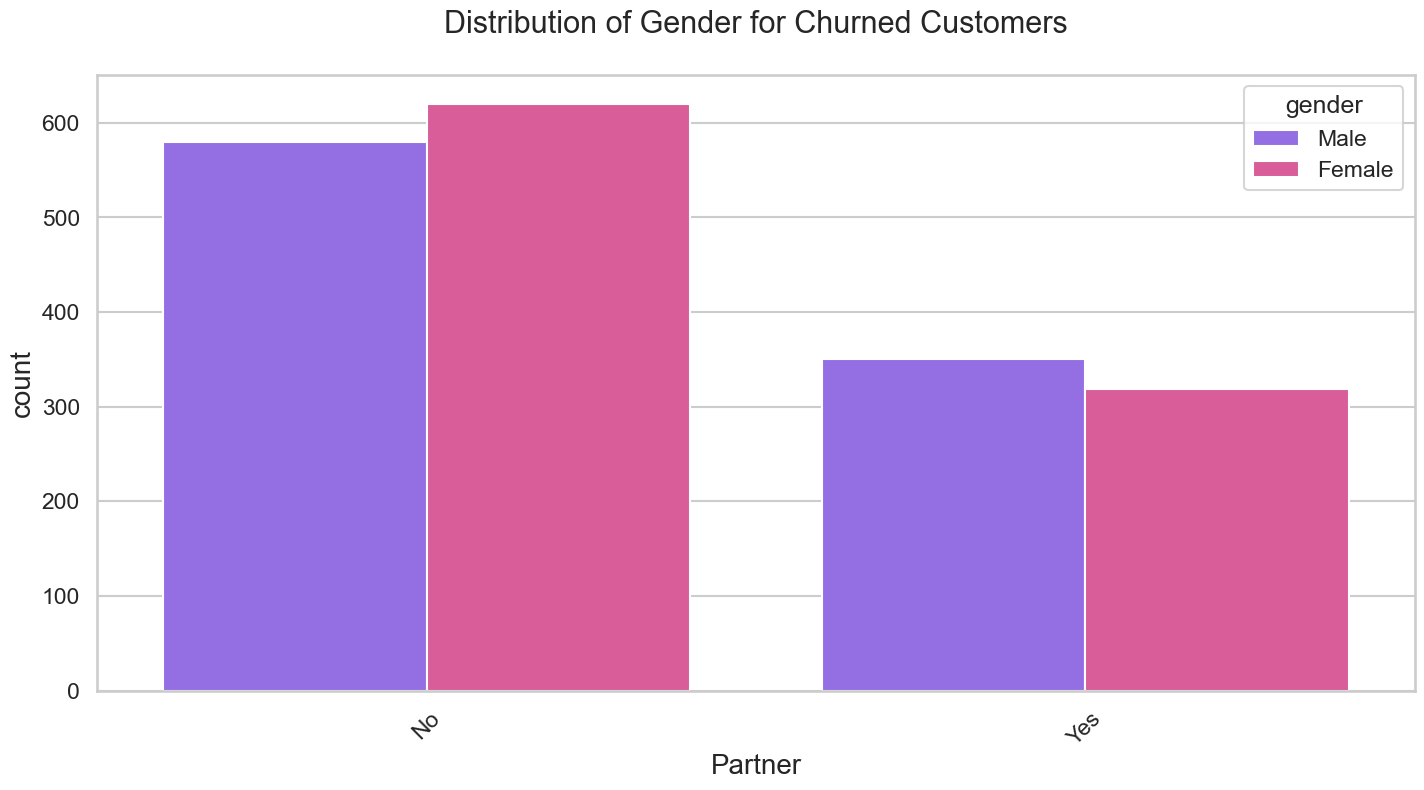

In [145]:
uniplot(telco_numeric_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

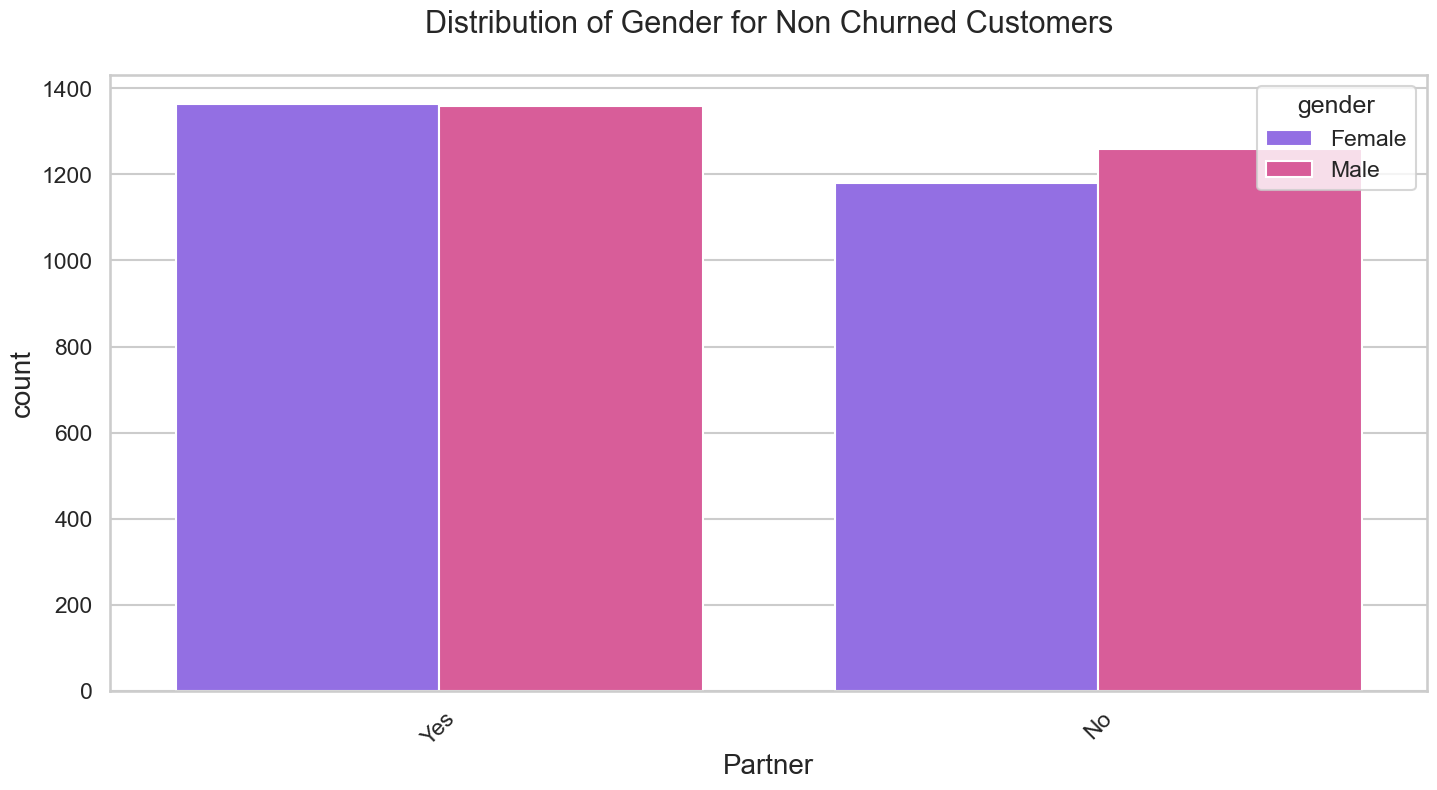

In [146]:
uniplot(telco_numeric_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

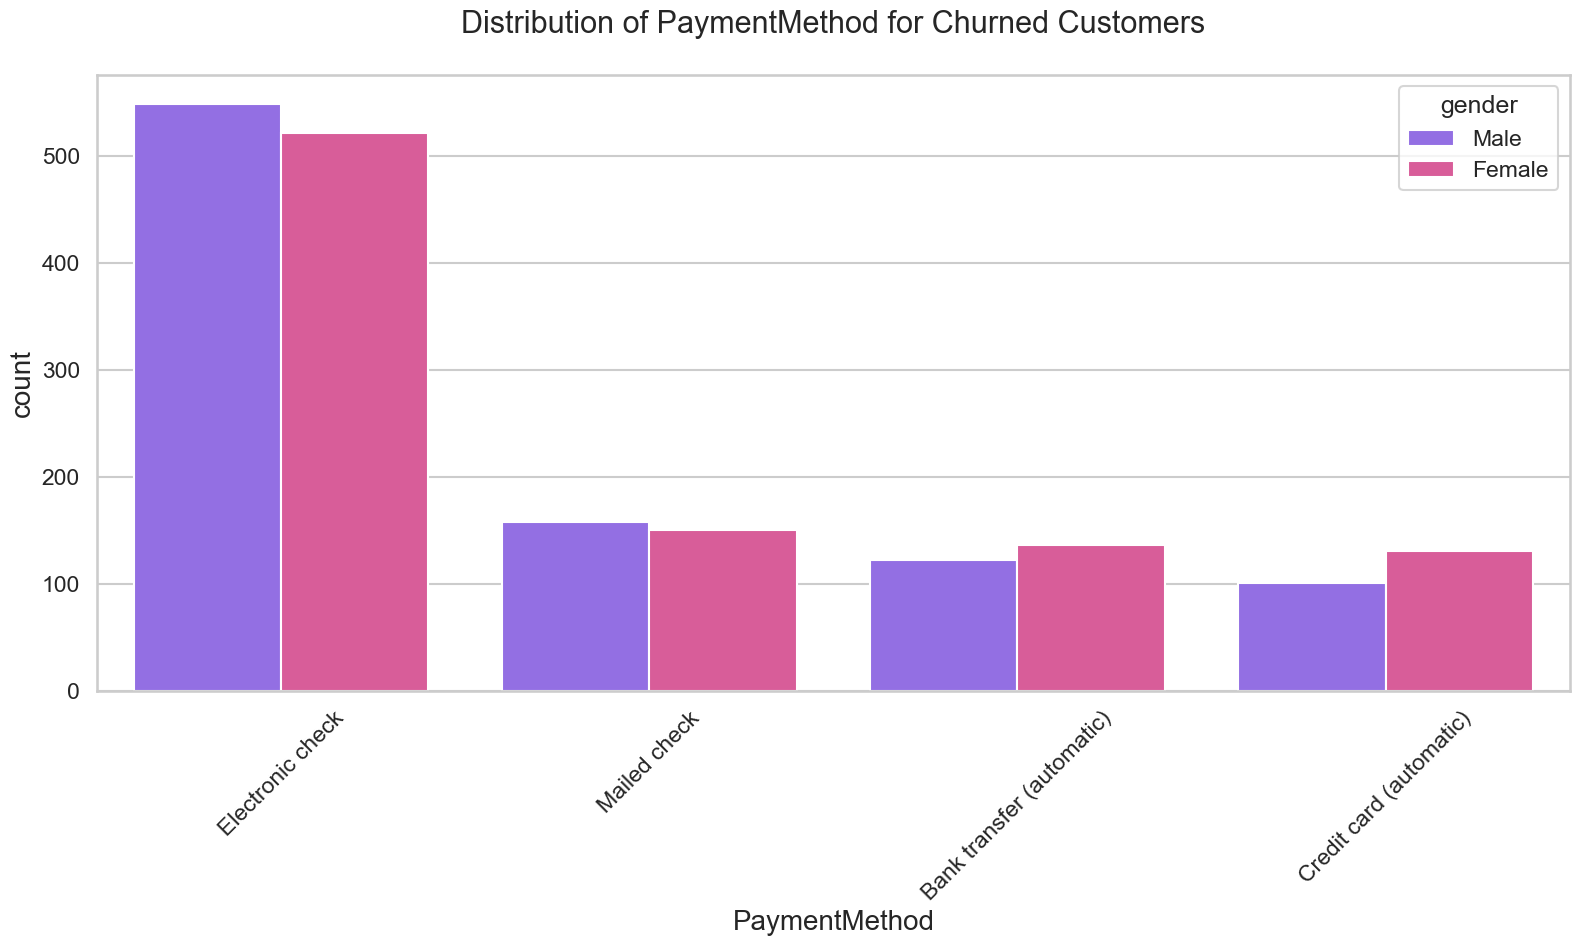

In [147]:
uniplot(telco_numeric_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

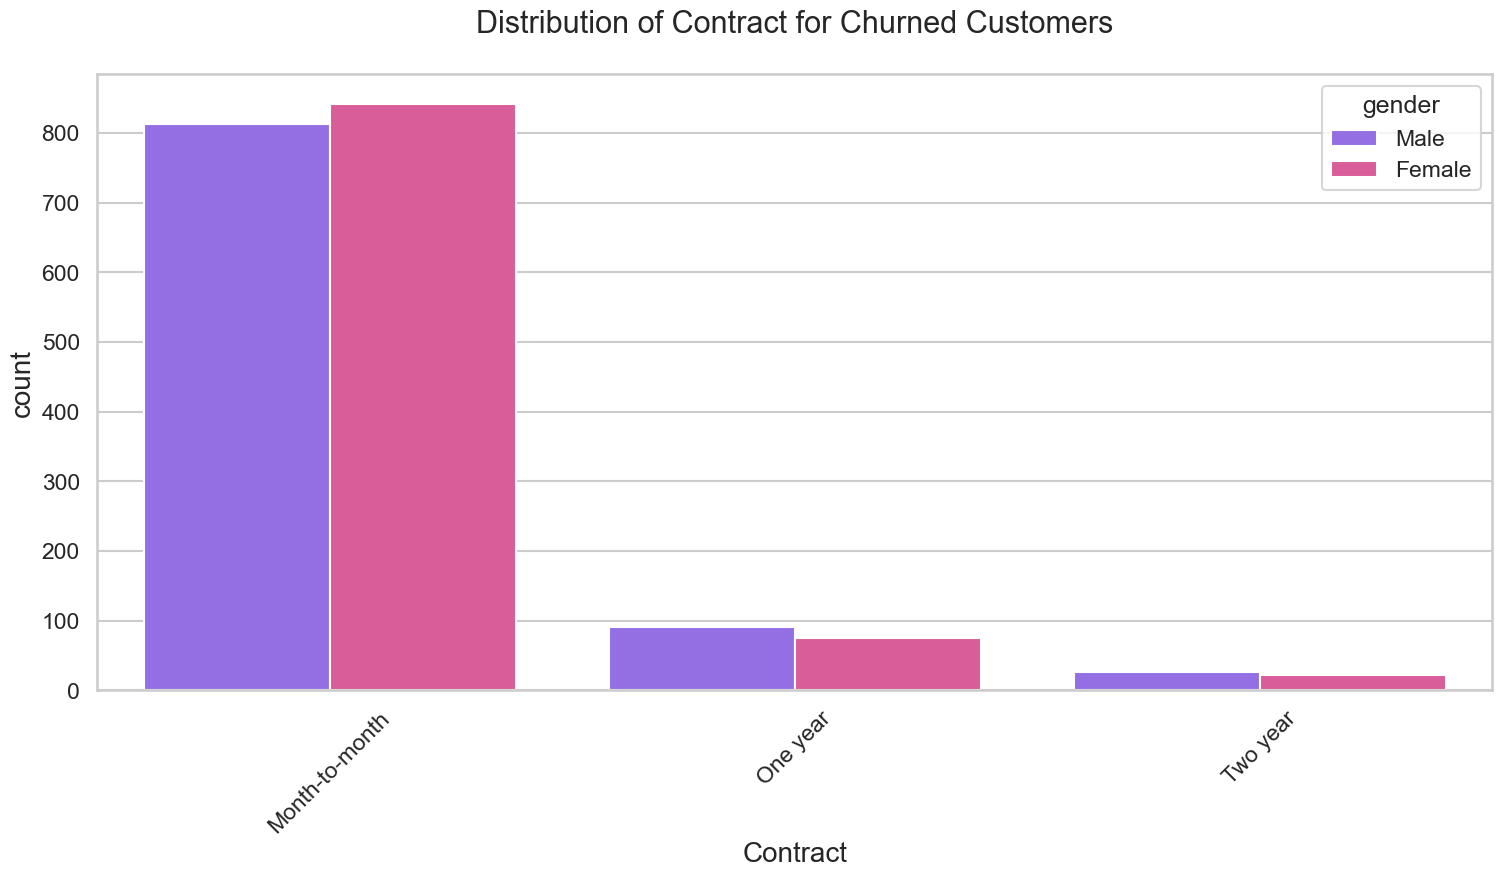

In [148]:
uniplot(telco_numeric_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

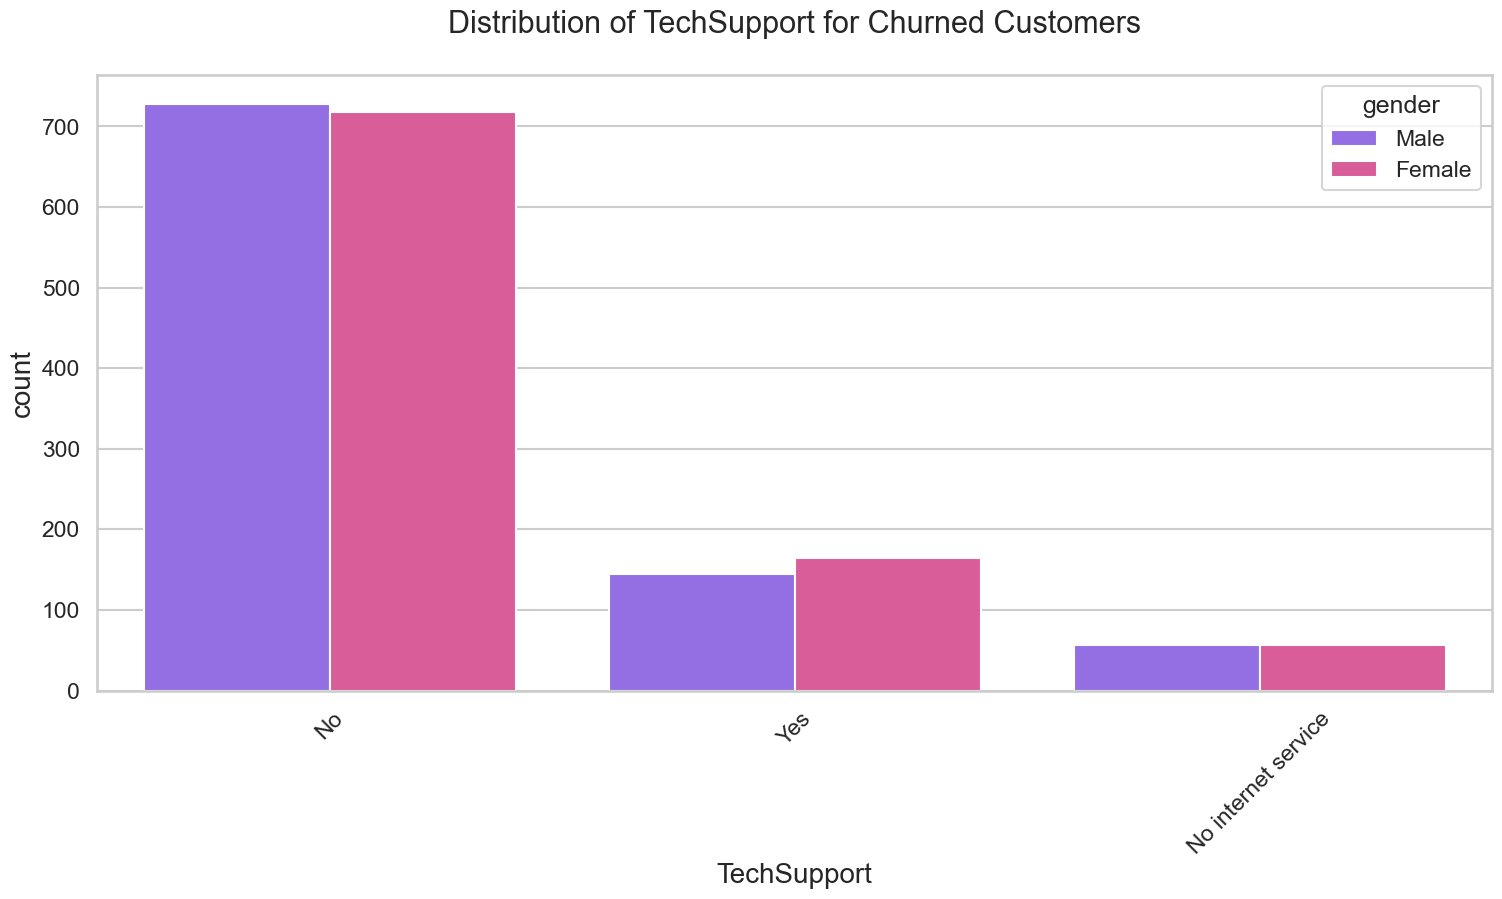

In [149]:
uniplot(telco_numeric_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

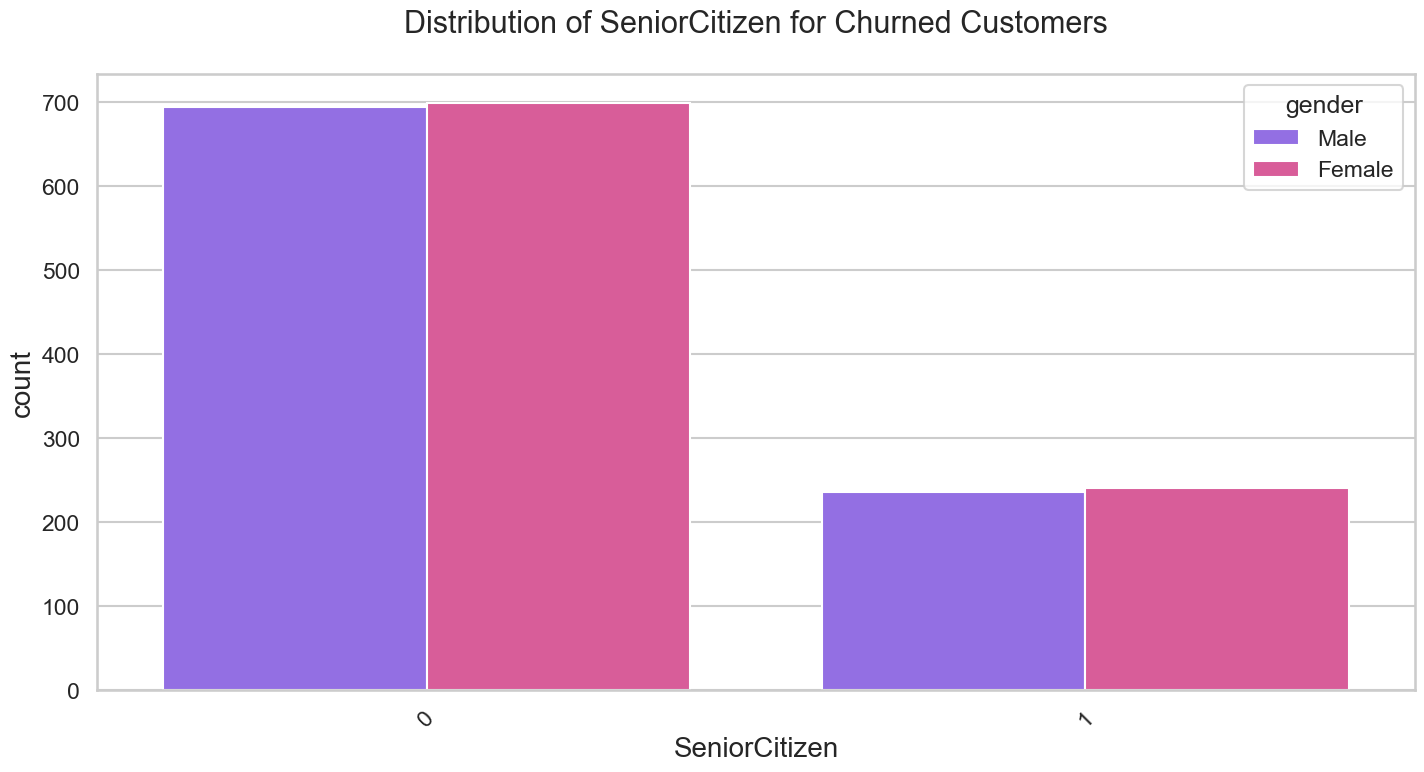

In [150]:
uniplot(telco_numeric_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

Apart from insights driven from previous sections, there are more insights including:

1. Females with no partners tend to churn.
2. Females who pay via electronic check tend to churn more.
3. Monthly female customers are more likely to churn because of no contract terms, as they are free to go customers.
4. No Online security, No Tech Support results in high churners.
5. Non senior Citizens are high churners.